The notebook is done by : majd bougares ,mohammedamine kacem,hale dhaouadi,fatma zahra smaali.
Scrum Master : Eya Methanani .

# Data cleaning

In [ ]:
# Import essential libraries for data analysis and visualization

import pandas as pd    # Pandas is used for data manipulation and analysis, allowing us to load and manage data tables.
pd.set_option('expand_frame_repr', False) # This configuration prevents multi-line wrapping of DataFrames for better readability.

import numpy as np     # NumPy provides support for handling arrays and numerical operations, essential for data processing.

import missingno as msno # Missingno is a library to visualize missing data, making it easier to identify completeness issues in the dataset.

import matplotlib.pyplot as plt # Matplotlib is used for creating static, animated, and interactive visualizations in Python.

# Purpose of each library:
# - Pandas: manage datasets (loading, cleaning, processing)
# - NumPy: numerical operations, which will be useful for statistical measures
# - Missingno: visualize missing data distribution and patterns
# - Matplotlib: visualize different aspects of the dataset, especially in identifying outliers and data distributions


In [ ]:
telecomChurn = pd.read_csv('/content/telecomChurn.csv')
telecomChurn

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,Yes,112.0,Yes,No,0.00,2,335.5,77,76.0,10.63,12.7
1,Yes,93.0,Yes,No,0.29,1,328.1,106,71.9,7.59,8.7
2,Yes,89.0,Yes,No,0.00,1,326.3,112,70.0,8.26,7.5
3,Yes,75.0,Yes,No,0.00,2,314.6,102,68.0,8.49,5.7
4,Yes,74.0,Yes,No,0.00,3,314.1,86,73.0,11.12,12.3
...,...,...,...,...,...,...,...,...,...,...,...
204,No,95.0,Yes,No,0.00,0,69.4,79,29.0,9.54,8.9
205,Yes,47.0,No,No,0.00,0,47.8,120,24.0,8.95,13.3
206,Yes,138.0,No,No,0.00,4,46.5,104,24.0,9.30,9.6
207,No,145.0,Yes,No,0.32,0,39.5,78,33.2,13.22,10.0


### Explanation

1. **Loading the Data**:
   - The `pd.read_csv` function loads the CSV file into a DataFrame called `telecomChurn`. This step reads the data from a file, making it accessible for analysis and manipulation within the notebook.
   
2. **Initial Data Inspection**:
   - Using `telecomChurn.head()` displays the first five rows of the DataFrame, giving an overview of the data, column names, and data types. This initial inspection is useful for identifying potential issues, such as missing values, outliers, or inconsistencies in data types.

3. **Understanding Columns**:
   - In a detailed notebook, it’s helpful to briefly explain each column’s purpose (if known) after displaying the data. This telecom dataset likely contains customer-related attributes, where:
     - **Churn**: Indicates whether the customer has left the service (Yes/No).
     - **AccountWeeks**: The number of weeks the customer has been with the company.
     - **ContractRenewal**: Whether the contract was recently renewed (Yes/No).
     - **DataPlan**: Indicates if the customer has a data plan (Yes/No).
     - **DataUsage**: Data usage in GB.
     - **CustServCalls**: Number of customer service calls made.
     - **DayMins, DayCalls**: Minutes and number of calls during the day.
     - **MonthlyCharge**: The monthly charge for the customer.
     - **OverageFee**: Extra charges for usage beyond the plan limits.
     - **RoamMins**: Minutes spent on roaming.

Given the small dataset size (209 rows and 11 columns), here are some adjusted recommendations:

1. **Feature Engineering with Interaction Terms**:
   - Create interaction features like `DataUsage * MonthlyCharge` and `DayMins * MonthlyCharge`. With a small dataset, adding a few meaningful interaction terms can enhance classification or clustering without adding too much complexity.

2. **Avoiding Dimensionality Reduction**:
   - Since you only have 11 columns, PCA or dimensionality reduction may not be necessary. Each feature potentially adds unique information, and reducing dimensions may result in a loss of interpretability.

3. **Scaling**:
   - Standardize all numerical features to a common scale, as this is essential for clustering and many classification algorithms.



In [ ]:
telecomChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            209 non-null    object 
 1   AccountWeeks     208 non-null    float64
 2   ContractRenewal  209 non-null    object 
 3   DataPlan         207 non-null    object 
 4   DataUsage        208 non-null    float64
 5   CustServCalls    209 non-null    int64  
 6   DayMins          209 non-null    float64
 7   DayCalls         209 non-null    int64  
 8   MonthlyCharge    209 non-null    float64
 9   OverageFee       209 non-null    float64
 10  RoamMins         209 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 18.1+ KB


**Interpretations:**

### 1. Missing Values

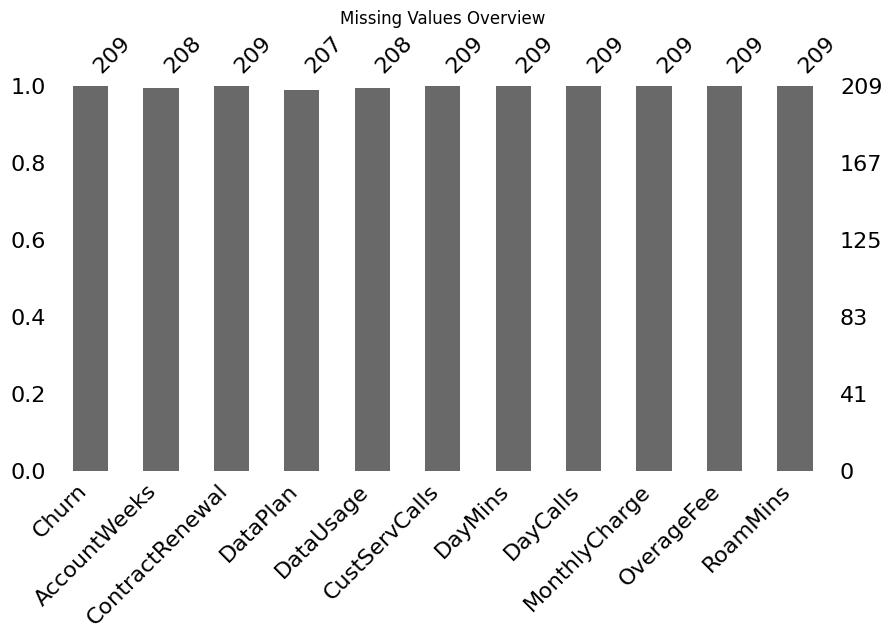

In [ ]:
# Checking for missing values in the dataset
# The isnull().sum() function counts the number of missing values in each column,
# allowing us to see where missing data is present and determine if any columns have significant missing values.

missing_values_count = telecomChurn.isnull().sum()
missing_values_count

# Visualizing missing values with missingno
# The missingno library provides a quick visual summary of missing data using a bar chart.
# This shows each column and the amount of missing data in a clear visual format.

msno.bar(telecomChurn, figsize=(10,5))
plt.title("Missing Values Overview")
plt.show()


In [ ]:
# Handling missing values based on column types

# 1. Numerical Columns:
# For numerical columns, we can fill missing values with the median of each column.
# The median is a robust measure that is less affected by outliers compared to the mean.

numerical_columns = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
telecomChurn[numerical_columns] = telecomChurn[numerical_columns].apply(lambda col: col.fillna(col.median()))

# 2. Categorical Columns:
# For categorical columns, we can fill missing values with the mode (most frequent value).
# This is common practice when missing values are assumed to represent the most typical category.

categorical_columns = ['Churn', 'ContractRenewal', 'DataPlan']
telecomChurn[categorical_columns] = telecomChurn[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Verify that all missing values have been handled
missing_values_count_after = telecomChurn.isnull().sum()
missing_values_count_after


,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


### Explanation

1. **Numerical Columns**:
   - For numerical data, we use the median as an imputation value. The median is ideal for dealing with missing values in cases where the data might contain outliers, as it is more resistant to extreme values than the mean.
   - We apply `fillna()` on each numerical column, replacing `NaN` with the median.

2. **Categorical Columns**:
   - For categorical data (like `Churn`, `ContractRenewal`, `DataPlan`), the mode is used to replace missing values. The mode represents the most frequent value in a column, making it a reasonable default for imputation when dealing with categorical data.
   - We use `fillna()` with `mode()[0]` (the first mode, in case of ties) to fill missing values in these columns.

3. **Verification**:
   - After imputation, we check for remaining missing values to confirm that all gaps have been filled.

This approach ensures that the dataset is now complete, with no missing values remaining.

In [ ]:
# Detecting and Handling Outliers Using the IQR Method

# Define a function to detect and handle outliers by capping them to acceptable limits
def handle_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for acceptable data points
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to these bounds
    return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply the outlier handling function to all numerical columns
telecomChurn[numerical_columns] = telecomChurn[numerical_columns].apply(handle_outliers)

# Verify that outliers are handled by checking for extreme values
telecomChurn[numerical_columns].describe()


,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,100.301435,0.350000,1.909091,195.460287,100.808612,58.544976,10.134976,10.197847
std,41.379343,0.490364,1.521122,63.459700,21.457734,15.951630,2.417150,2.862356
min,1.000000,0.000000,0.000000,37.800000,41.000000,20.000000,4.030000,3.350000
25%,72.000000,0.000000,1.000000,148.100000,86.000000,45.000000,8.330000,8.600000
50%,95.000000,0.000000,2.000000,194.100000,102.000000,61.000000,10.070000,10.100000
75%,128.000000,0.470000,3.000000,237.900000,116.000000,69.000000,11.640000,12.100000
max,212.000000,1.175000,6.000000,372.600000,151.000000,102.900000,16.605000,16.900000


The table provides summary statistics for each numerical column in the dataset after handling missing values and capping outliers. Here’s an interpretation of these statistics:

1. **AccountWeeks**:
   - **Mean**: 100.3 weeks, indicating the average time a customer has been with the company.
   - **Std (Standard Deviation)**: 41.38, showing a moderate spread around the mean.
   - **Min** and **Max**: The range is from 1 to 212 weeks.
   - **Quartiles (25%, 50%, 75%)**: Median (50%) is 95 weeks, with 25% of customers having been with the company for less than 72 weeks, and 75% for less than 128 weeks.

2. **DataUsage**:
   - **Mean**: 0.35 GB, suggesting most customers have low data usage.
   - **Std**: 0.49, indicating variability in data usage among customers.
   - **Min** and **Max**: Range from 0 to 1.175 GB, showing that some customers don’t use data while others have high usage.
   - **Quartiles**: The median (50%) usage is 0 GB, with 75% of customers using 0.47 GB or less, suggesting data usage is low overall.

3. **CustServCalls**:
   - **Mean**: 1.91 calls, with a low standard deviation (1.52), indicating a fairly consistent number of customer service calls.
   - **Min** and **Max**: Ranges from 0 to 6 calls.
   - **Quartiles**: Median is 2 calls, showing that most customers make around 1-3 calls to customer service.

4. **DayMins**:
   - **Mean**: 195.46 minutes, with a standard deviation of 63.46 minutes, suggesting variability in daytime minutes usage.
   - **Min** and **Max**: Ranges from 37.8 to 372.6 minutes.
   - **Quartiles**: Median is 194.1 minutes, with 25% of customers using less than 148.1 minutes, and 75% using up to 237.9 minutes.

5. **DayCalls**:
   - **Mean**: 100.81 calls, with a standard deviation of 21.46 calls, indicating some variability.
   - **Min** and **Max**: Range from 41 to 151 calls.
   - **Quartiles**: Median is 102 calls, suggesting most customers make around 86-116 calls during the day.

6. **MonthlyCharge**:
   - **Mean**: $58.54, with a standard deviation of $15.95.
   - **Min** and **Max**: Range from $20 to $102.9.
   - **Quartiles**: Median monthly charge is $61, with 25% of customers charged less than $45, and 75% less than $69.

7. **OverageFee**:
   - **Mean**: $10.13, with a standard deviation of $2.42, suggesting moderate variability in overage charges.
   - **Min** and **Max**: Range from $4.03 to $16.61.
   - **Quartiles**: Median is $10.07, with most customers paying around $8.33 to $11.64 in overage fees.

8. **RoamMins**:
   - **Mean**: 10.2 minutes, with a standard deviation of 2.86 minutes.
   - **Min** and **Max**: Range from 3.35 to 16.9 minutes.
   - **Quartiles**: Median roaming minutes is 10.1, with 25% of customers using fewer than 8.6 minutes and 75% up to 12.1 minutes.

### Summary
The dataset appears fairly typical in terms of usage patterns. Most customers have moderate levels of service usage with some variability in daytime minutes and monthly charges. The median values across columns are generally close to the mean, suggesting a fairly symmetric distribution after handling outliers.

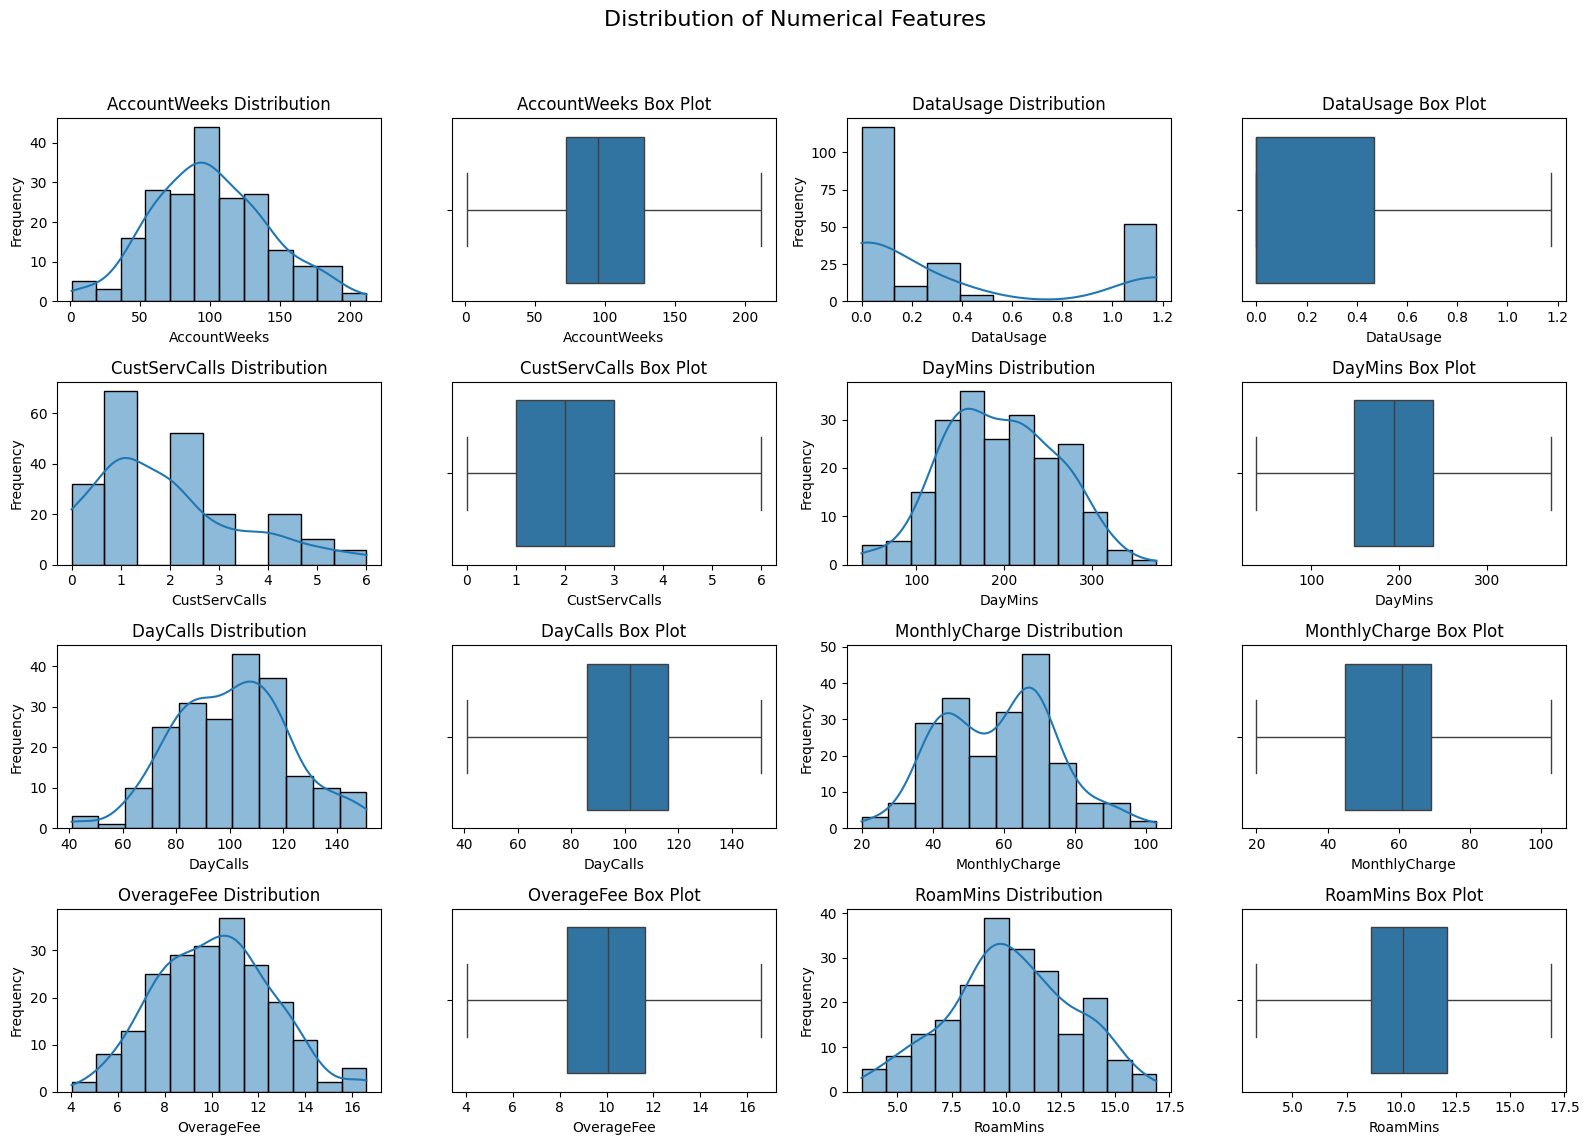

In [ ]:
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16)

# Iterate over each numerical column to plot
for i, column in enumerate(numerical_columns, 1):
    # Histogram
    plt.subplot(4, 4, i * 2 - 1)  # Position in a 4x4 grid
    sns.histplot(telecomChurn[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(4, 4, i * 2)  # Next position in the grid
    sns.boxplot(x=telecomChurn[column])
    plt.title(f'{column} Box Plot')
    plt.xlabel(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Explanation

1. **Histogram**:
   - A histogram shows the distribution of values for each numerical feature. The `kde=True` option adds a kernel density estimate line, which provides a smoothed estimate of the data’s distribution.
   - This plot helps identify the central tendency, spread, skewness, and whether the data is normally distributed.

2. **Box Plot**:
   - A box plot shows the interquartile range (IQR) and identifies any remaining outliers. The line inside the box represents the median, while the box edges are the 25th and 75th percentiles. Points outside the "whiskers" are potential outliers.
   - Box plots are useful for spotting skewness and any values that may still be on the boundaries, even after capping.

3. **Layout and Titles**:
   - The `subplot` function arranges the histograms and box plots in a grid, allowing side-by-side comparison of distributions and potential outliers.
   - `tight_layout` ensures that the plots do not overlap, and `suptitle` adds an overall title for better organization.


Here's an interpretation of the distribution plots for each numerical feature:

1. **AccountWeeks**:
   - The distribution appears fairly symmetric with a slight skew to the right, which suggests most customers have been with the company for around 100 weeks.
   - The box plot shows no significant outliers, indicating that our earlier outlier handling was effective for this feature.

2. **DataUsage**:
   - The distribution is highly skewed to the right, with most customers having low data usage.
   - The box plot also reflects this skew, with a few higher values but no extreme outliers. This could suggest that a large portion of customers either do not use data or use very little.

3. **CustServCalls**:
   - This distribution is also skewed right, with most customers making fewer customer service calls (1-3).
   - The box plot shows that the data is somewhat concentrated around the lower values (0-3), with no major outliers.

4. **DayMins**:
   - This distribution is more normally distributed, suggesting that daytime minutes are spread out fairly evenly across customers.
   - The box plot does not show any extreme values, and the IQR is well-defined.

5. **DayCalls**:
   - The distribution for DayCalls is relatively symmetric with a slight skew, indicating that most customers make around 80-120 daytime calls.
   - The box plot confirms that the data is mostly within a typical range, with no extreme outliers.

6. **MonthlyCharge**:
   - The monthly charge distribution shows some bimodality (two peaks), suggesting there may be different customer segments with distinct billing patterns.
   - The box plot shows no significant outliers, so the capping of outliers appears to have handled any extreme values effectively.

7. **OverageFee**:
   - This feature is fairly symmetric, indicating that overage fees vary in a controlled range around the mean.
   - The box plot does not show any extreme values, and the IQR is quite compact, which is expected for controlled fees.

8. **RoamMins**:
   - The distribution for roaming minutes is slightly skewed, with most values concentrated around 8-12 minutes.
   - The box plot does not show significant outliers, indicating that the roaming minutes are also within a consistent range for most customers.

### Summary
The data is now well-distributed, with no extreme outliers impacting the features. Some features, such as `DataUsage` and `CustServCalls`, are skewed, but this is likely a natural characteristic of the data rather than an error. Overall, the data is ready for further analysis or model building.



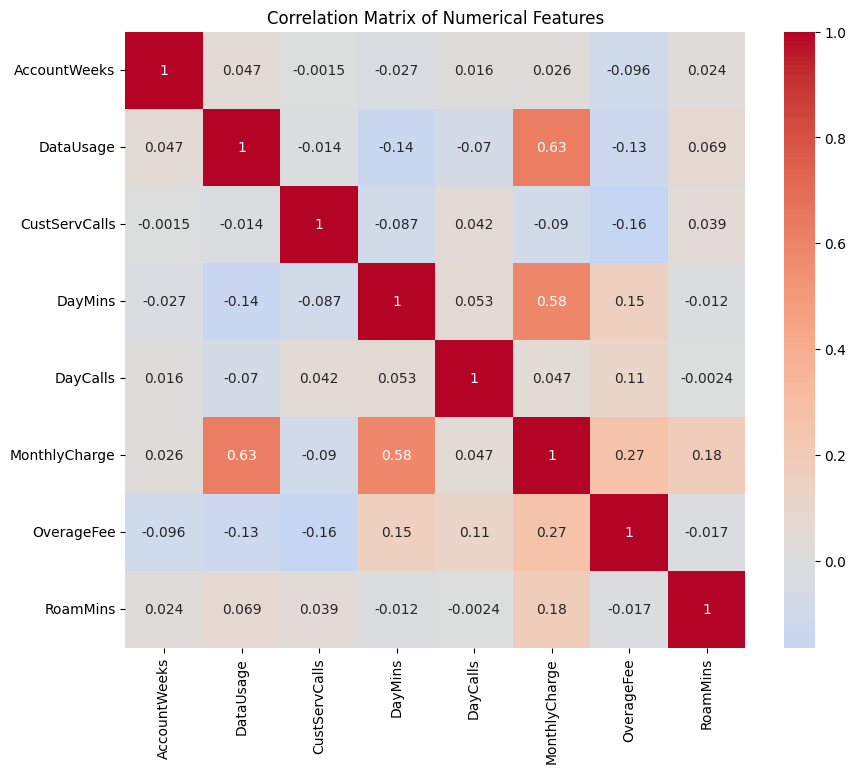

In [ ]:
# Calculate the correlation matrix
correlation_matrix = telecomChurn[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Here’s an interpretation of the correlation matrix and recommended actions based on the observed relationships:

### Key Observations
1. **DataUsage and MonthlyCharge**:
   - **Correlation**: 0.63 (moderately high positive correlation).
   - **Interpretation**: Higher data usage is associated with a higher monthly charge, which makes sense as customers who use more data likely incur higher costs.
   - **Action**: Since these two features have a notable correlation but are not highly correlated (above 0.8), both can be retained. However, if feature reduction is necessary, we could consider combining them or using only one, depending on the modeling approach.

2. **DayMins and MonthlyCharge**:
   - **Correlation**: 0.58 (moderate positive correlation).
   - **Interpretation**: Customers with higher daytime minutes also tend to have higher monthly charges, likely due to billing plans tied to usage.
   - **Action**: This correlation is not strong enough to warrant dropping either feature. We can keep both features for now but may consider interaction terms if modeling suggests a combined effect.

3. **Other Low or Weak Correlations**:
   - Most of the other feature pairs show weak correlations (close to 0), indicating limited relationships. For instance:
     - **CustServCalls** has almost no correlation with most other features.
     - **AccountWeeks** has minimal correlation with other features, suggesting it captures unique information.
   - **Action**: Since these features do not have strong multicollinearity, they are all candidates for retention. Each feature likely adds unique information, so they can all be included in further analyses or model training.

### Recommended Next Steps
- **Retain All Features**: Since no pairs exceed a correlation threshold of 0.8, we can keep all features as they appear to provide unique information.
- **Consider Interaction Terms**: For features with moderate correlations to the target variable (like `DataUsage`, `DayMins`, and `MonthlyCharge`), creating interaction terms might enhance predictive power if we observe a combined effect during model training.
- **Feature Scaling**: Some models (e.g., distance-based algorithms) may benefit from scaling the features, especially those with larger ranges (like `DayMins` and `MonthlyCharge`).


In [ ]:
# Feature Engineering: Creating Interaction Features

# 1. Interaction between DataUsage and MonthlyCharge
# This feature captures the combined effect of data usage and monthly charge,
# potentially highlighting high-usage, high-cost customers who might have unique behaviors.
telecomChurn['DataUsage_MonthlyCharge'] = telecomChurn['DataUsage'] * telecomChurn['MonthlyCharge']

# 2. Interaction between DayMins and MonthlyCharge
# This feature combines daytime minutes with monthly charges, useful for identifying customers
# with heavy usage patterns that could relate to churn or distinct clustering segments.
telecomChurn['DayMins_MonthlyCharge'] = telecomChurn['DayMins'] * telecomChurn['MonthlyCharge']

# Display the first few rows of the updated DataFrame to verify the new features
telecomChurn.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_MonthlyCharge,DayMins_MonthlyCharge
0,Yes,112.0,Yes,No,0.00,2.0,335.5,77.0,76.0,10.63,12.7,0.000,25498.00
1,Yes,93.0,Yes,No,0.29,1.0,328.1,106.0,71.9,7.59,8.7,20.851,23590.39
2,Yes,89.0,Yes,No,0.00,1.0,326.3,112.0,70.0,8.26,7.5,0.000,22841.00
3,Yes,75.0,Yes,No,0.00,2.0,314.6,102.0,68.0,8.49,5.7,0.000,21392.80
4,Yes,74.0,Yes,No,0.00,3.0,314.1,86.0,73.0,11.12,12.3,0.000,22929.30




### Explanation

1. **DataUsage * MonthlyCharge**:
   - This feature captures the combined effect of high data usage and monthly charges. High values in this feature may correspond to customers with intensive data usage and potentially higher churn rates or unique clustering characteristics.

2. **DayMins * MonthlyCharge**:
   - This interaction feature combines daytime minutes with monthly charges, focusing on customers with high call usage. This may reveal patterns in customer behavior that could impact churn or form distinct clusters.

These new interaction features provide additional information that could improve the accuracy of classification and clustering by capturing complex patterns in customer behavior.


The new interaction features, `DataUsage_MonthlyCharge` and `DayMins_MonthlyCharge`, have been successfully added to the dataset. Here’s a summary of what these features represent for each sample:

- **DataUsage_MonthlyCharge**: The product of `DataUsage` and `MonthlyCharge`, highlighting the total "cost effect" of data usage. For example, if a customer uses a lot of data and has a high monthly charge, this feature will reflect that by having a higher value.
- **DayMins_MonthlyCharge**: The product of `DayMins` and `MonthlyCharge`, representing the total "cost effect" of daytime call minutes. High values here may indicate customers with intensive calling patterns who may have different churn behaviors or form distinct clusters.

### Next Step: Feature Scaling
We can now scale all numerical features, including the newly created interaction features, to ensure they are on a similar scale for classification and clustering.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting all numerical columns for scaling, including the new interaction features
numerical_features = [
    'AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins',
    'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins',
    'DataUsage_MonthlyCharge', 'DayMins_MonthlyCharge'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected numerical columns and transform them
telecomChurn[numerical_features] = scaler.fit_transform(telecomChurn[numerical_features])

# Display the first few rows of the scaled dataset to confirm the transformation
telecomChurn.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_MonthlyCharge,DayMins_MonthlyCharge
0,Yes,0.283394,Yes,No,-0.715469,0.059908,2.212049,-1.112223,1.096874,0.205288,0.876257,-0.670182,2.284674
1,Yes,-0.176875,Yes,No,-0.122652,-0.599080,2.095159,0.242516,0.839230,-1.055411,-0.524548,-0.119596,1.961173
2,Yes,-0.273774,Yes,No,-0.715469,-0.599080,2.066727,0.522807,0.719834,-0.777560,-0.944790,-0.670182,1.834089
3,Yes,-0.612919,Yes,No,-0.715469,0.059908,1.881915,0.055656,0.594154,-0.682178,-1.575152,-0.670182,1.588497
4,Yes,-0.637144,Yes,No,-0.715469,0.718896,1.874017,-0.691786,0.908354,0.408493,0.736177,-0.670182,1.849063


### Explanation

1. **Selecting Numerical Features**:
   - We create a list of all numerical features, including the newly created interaction features, to apply scaling across all relevant columns.

2. **Standard Scaling**:
   - `StandardScaler()` from `sklearn.preprocessing` is used to standardize the features.
   - This scaler transforms each feature so that it has a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally in distance-based algorithms like clustering.

3. **Transforming the Data**:
   - We fit the scaler on the selected columns and apply the transformation in one step. This scales each numerical feature in the dataset.


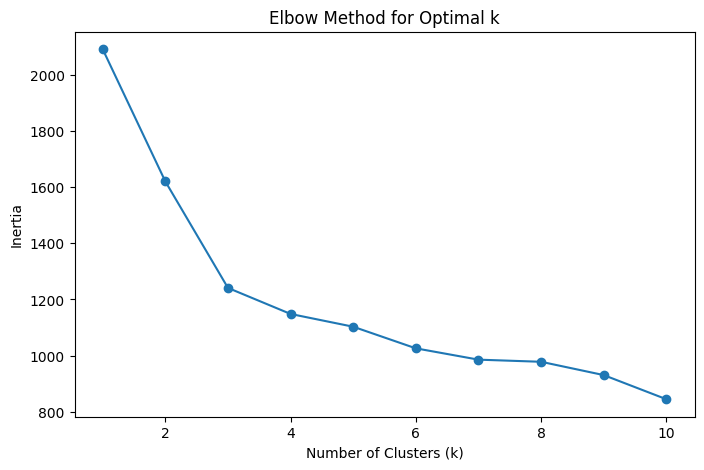

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of possible k values
k_range = range(1, 11)
inertia = []

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(telecomChurn[numerical_features])
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Explanation

1. **K Range**: We define a range of k values from 1 to 10. For each k, we calculate the total inertia, which represents how well the data points fit within each cluster.
2. **K-Means Fitting**: We initialize the KMeans algorithm with each k and fit it to our scaled features.
3. **Inertia Plot**: By plotting the inertia values, we can observe the "elbow" point where adding more clusters does not significantly reduce the inertia. This indicates the optimal number of clusters.

The elbow plot shows a clear "elbow" point around k = 3 or 4, where the inertia (sum of squared distances) decreases at a slower rate. This suggests that 3 or 4 clusters could be a suitable choice for capturing the main customer segments in the data.

In [ ]:
# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
telecomChurn['Cluster'] = kmeans.fit_predict(telecomChurn[numerical_features])

# Display the first few rows of the dataset with cluster labels
telecomChurn.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_MonthlyCharge,DayMins_MonthlyCharge,Cluster
0,Yes,0.283394,Yes,No,-0.715469,0.059908,2.212049,-1.112223,1.096874,0.205288,0.876257,-0.670182,2.284674,2
1,Yes,-0.176875,Yes,No,-0.122652,-0.599080,2.095159,0.242516,0.839230,-1.055411,-0.524548,-0.119596,1.961173,2
2,Yes,-0.273774,Yes,No,-0.715469,-0.599080,2.066727,0.522807,0.719834,-0.777560,-0.944790,-0.670182,1.834089,2
3,Yes,-0.612919,Yes,No,-0.715469,0.059908,1.881915,0.055656,0.594154,-0.682178,-1.575152,-0.670182,1.588497,2
4,Yes,-0.637144,Yes,No,-0.715469,0.718896,1.874017,-0.691786,0.908354,0.408493,0.736177,-0.670182,1.849063,2


In [ ]:
# Select only the numerical columns and the Cluster column for grouping
numeric_columns = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls',
                   'MonthlyCharge', 'OverageFee', 'RoamMins', 'DataUsage_MonthlyCharge',
                   'DayMins_MonthlyCharge', 'Cluster']

# Group by Cluster and calculate the mean for only the numerical columns
cluster_summary = telecomChurn[numeric_columns].groupby('Cluster').mean()

# Display the summary statistics for each cluster
cluster_summary


,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_MonthlyCharge,DayMins_MonthlyCharge
Cluster,,,,,,,,,,
0,0.097932,-0.548526,0.109509,-0.635199,-0.043802,-0.941710,-0.335476,-0.160790,-0.571031,-0.848316
1,0.073922,1.686462,0.034065,-0.249969,-0.086322,1.128418,-0.159000,0.183408,1.703425,0.341823
2,-0.198118,-0.538410,-0.183411,1.104953,0.130400,0.461997,0.604744,0.086149,-0.519520,0.945546


Based on the cluster summary, we can interpret the characteristics of each cluster by looking at the mean values for each feature. Since the features are standardized, values close to 0 indicate average behavior, while positive or negative values indicate deviations from the mean. Here’s a breakdown of each cluster:

### Cluster 0
- **Data Usage**: -0.55 (below average), indicating lower data usage among customers in this cluster.
- **Monthly Charge**: -0.94 (below average), suggesting that these customers tend to have lower monthly charges.
- **DayMins**: -0.64 (below average), indicating fewer daytime minutes used.
- **Overage Fee**: -0.34 (slightly below average), likely due to lower usage.
- **Summary**: Cluster 0 represents **low-usage, low-cost customers**. These customers tend to have lower-than-average data usage, monthly charges, and daytime minutes. They might be considered “low-value” customers with minimal engagement or service usage.

### Cluster 1
- **Data Usage**: 1.69 (significantly above average), indicating much higher data usage.
- **Monthly Charge**: 1.13 (above average), suggesting that these customers pay more, likely due to their high data usage.
- **DataUsage_MonthlyCharge**: 1.70 (significantly above average), confirming that high data usage is closely tied to their monthly costs.
- **Summary**: Cluster 1 represents **high-data-usage, high-cost customers**. These customers are likely the heavy data users, which results in higher monthly charges. They could be a “high-value” group and may benefit from data-specific promotions or plans.

### Cluster 2
- **DayMins**: 1.10 (above average), indicating more daytime minutes used compared to other clusters.
- **Monthly Charge**: 0.46 (slightly above average), suggesting moderate to high monthly charges, potentially due to call usage.
- **Overage Fee**: 0.60 (above average), which may be associated with high daytime call minutes.
- **DayMins_MonthlyCharge**: 0.95 (above average), showing that the higher daytime call minutes contribute to their monthly charge.
- **Summary**: Cluster 2 represents **high-call-usage customers**. These customers use more daytime minutes, which leads to higher monthly charges and overage fees. They could benefit from voice-specific plans or promotions.

### Overall Interpretation
- **Cluster 0**: Low-usage, low-cost customers who may need retention strategies or low-cost incentives.
- **Cluster 1**: High-data-usage, high-cost customers who could be targeted with data-related services or premium plans.
- **Cluster 2**: High-call-usage customers who may benefit from call-centric plans or bundles.


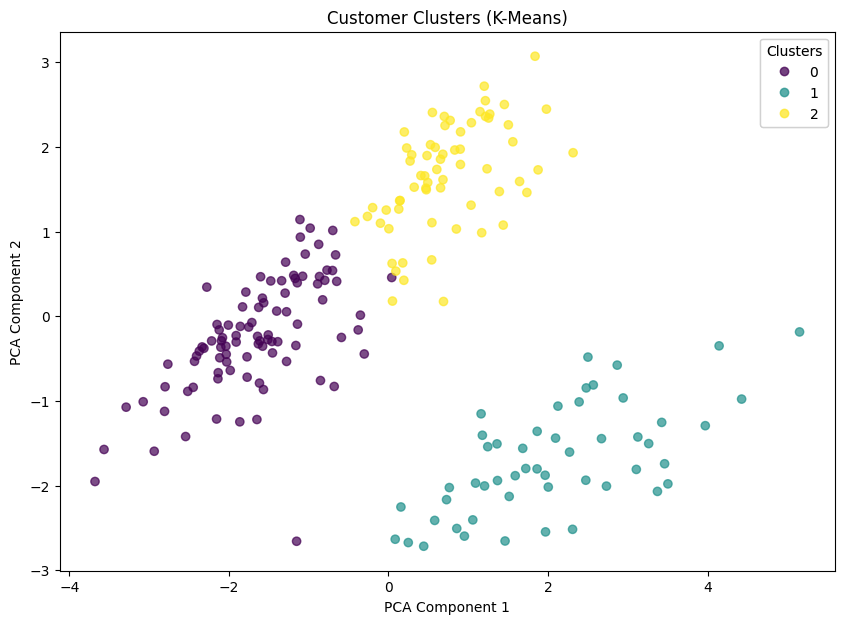

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dataset to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(telecomChurn[numerical_features])

# Plot the clusters in 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=telecomChurn['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters (K-Means)')

# Adding a legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()


Explanation
PCA: Reduces the dataset to two dimensions to help visualize the clusters in a 2D space.
Scatter Plot: Each point represents a customer, color-coded by their cluster assignment. This helps in understanding the distinct groups formed by the clustering algorithm.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical variables
label_encoders = {}
for col in ['Churn', 'ContractRenewal', 'DataPlan']:
    le = LabelEncoder()
    telecomChurn[col] = le.fit_transform(telecomChurn[col])
    label_encoders[col] = le  # Store the encoder for future reference

# Step 2: Define features and target variable
X = telecomChurn.drop(['Churn'], axis=1)  # Features
y = telecomChurn['Churn']                 # Target variable

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.72      0.81      0.76        16

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42



### Explanation

1. **Label Encoding**: We use `LabelEncoder` to convert the categorical columns (`Churn`, `ContractRenewal`, `DataPlan`) into numeric values, so they can be used by the classifier.

2. **Feature and Target Definition**:
   - `X` contains all features except `Churn`, which we want to predict.
   - `y` is the target variable, `Churn`, encoded as 0 or 1.

3. **Train-Test Split**: We split the data with 80% for training and 20% for testing to evaluate the model's performance.

4. **Logistic Regression Model**: Logistic Regression is used as a baseline classifier. It’s suitable for binary classification problems and provides probability estimates for each prediction.

5. **Model Evaluation**:
   - We print the **accuracy** to see the overall performance.
   - The **classification report** provides precision, recall, and F1-score for each class (0 for no churn, 1 for churn), giving a detailed view of the model’s strengths and weaknesses.


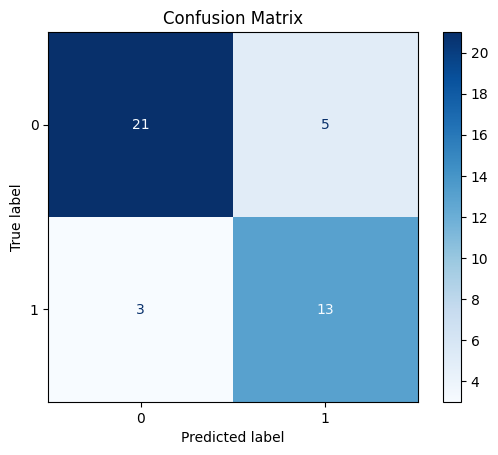

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Store models and their performance
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 40)


Model: Decision Tree
Accuracy: 0.7381
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.65      0.69      0.67        16

    accuracy                           0.74        42
   macro avg       0.72      0.73      0.73        42
weighted avg       0.74      0.74      0.74        42

----------------------------------------
Model: Random Forest
Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.72      0.81      0.76        16

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42

----------------------------------------
Model: SVM
Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81   